Assignment 1 (Supervised learning, kNN algorithm)

Anniina Mäkinen, Jyri Männikkö, Niina Pietilä

## Part 1

### 1.1 Dataset from Kaggle

**Dataset & kNN suitability**
- WineQT.csv on otettu Kagglesta - https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download
- Y-muuttuja: Quality - kertoo viinin laadun asteikolla 0-10. Tätä halutaan koittaa ennustaa muiden ominaisuuksien perusteella.
- scikit-learn = Pythonin koneoppimiskirjasto (malleja, aineiston jako, mittareita).

In [21]:
import pandas as pd

# Ladataan .CSV tiedosto 
df = pd.read_csv('WineQT.csv')  
#X = Piirteet, (selittävät muuttujat), Y = Kohdemuuttuja (laatu)
X = df.drop(['quality','Id'], axis=1)
y = df['quality']

#Pikatarkastus / Rivit / Sarakkeet ja muutama ensimmäinen rivi
print(df.shape)
df.head()

(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### 1.2Ensimmäinen kNN ajo (Mallin kouluttaminen) 


**Koulutetaan normaali kNN-malli (K=5) käyttäen 80/20 jakosuhdetta.**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 80/20 jako. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Perus kNN, k=5 (yleinen oletusarvo)
knn = KNeighborsClassifier(n_neighbors=5)

#mallin "opetus" vain treenidatalla
knn.fit(X_train, y_train)

len(X_train), len(X_test)

(914, 229)

### 1.2 Ensimmäinen kNN ajo (Testaus)

**Testataan koulutettu malli ja näytetään tarkkuus**

In [23]:
from sklearn.metrics import accuracy_score

#Ennusta testidatalle ja laske tarkkuus" (accuracy)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test accuracy (k=5):', acc)

Test accuracy (k=5): 0.5152838427947598


**Havainnollistetaan 80/20 jako**

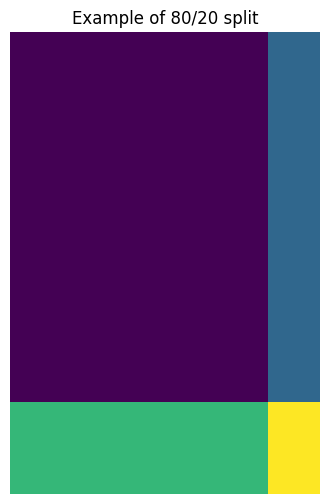

In [24]:
import numpy as np, matplotlib.pyplot as plt


#Yksinkertainen ruutukartta 80% train, 20%test 
grid = np.zeros((20,6))
grid[:16,:5]=1; grid[:16,5]=2; grid[16:,:5]=3; grid[16:,5]=4
plt.figure(figsize=(4,6))
plt.imshow(grid, aspect='auto')
plt.title('Example of 80/20 split')
plt.axis('off')
plt.show()

### 1.3 Listing of 2 more interresting use cases for kNN algorithm

**Two kNN use cases:**
1) Handwritten digit recognition (MNIST) as a simple baseline.
2) Customer similarity for basic recommendations.

Kaksi kNN:n käyttötapausta 

Käsinkirjoitettujen numeroiden tunnistus (MNIST) yksinkertaisena lähtötasona.

Asiakkaiden samankaltaisuuden tunnistaminen perussuositusten tekemiseksi

## Part 2

### 2.1 Experiments with different values of $k$

    k  test_accuracy
0   1       0.606987
1   3       0.502183
2   5       0.515284
3   7       0.528384
4   9       0.537118
5  11       0.524017
6  15       0.550218


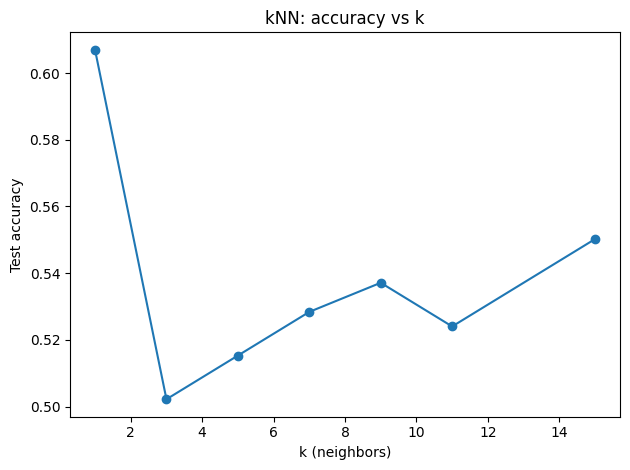

Paras k testissä: k=1, accuracy=0.6070


In [25]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Testataan useita k-arvoja ja katsotaan testitarkkuus
k_values = [1, 3, 5, 7, 9, 11, 15]
rows = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)              # opeta treenidatalla
    pred = model.predict(X_test)             # ennusta testidatalle
    acc = accuracy_score(y_test, pred)       # laske tarkkuus
    rows.append([k, acc])

# Taulukoksi
df_k = pd.DataFrame(rows, columns=['k', 'test_accuracy']).sort_values('k')
print(df_k)

# Yksi selkeä kuva (accuracy vs k)
plt.figure()
plt.plot(df_k['k'], df_k['test_accuracy'], marker='o')
plt.xlabel('k (neighbors)')
plt.ylabel('Test accuracy')
plt.title('kNN: accuracy vs k')
plt.tight_layout()
plt.show()

# Tulosta paras k
best_idx = df_k['test_accuracy'].idxmax()
best_k = int(df_k.loc[best_idx, 'k'])
best_acc = float(df_k.loc[best_idx, 'test_accuracy'])
print(f"Paras k testissä: k={best_k}, accuracy={best_acc:.4f}")


### 2.2 Studying the effect of different train/test splits

**Compare different test sizes with k=5.**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

rows = []

#Verrataan 20%, 30% ja 40% testiosuutta
for s in [0.2, 0.3, 0.4]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=s, random_state=42)
    m = KNeighborsClassifier(n_neighbors=5)
    m.fit(X_tr, y_tr)
    pred = m.predict(X_te)
    rows.append([s, accuracy_score(y_te, pred)])

df_splits = pd.DataFrame(rows, columns=['test_size','test_accuracy'])
df_splits.sort_values('test_size')

,test_size,test_accuracy
0,0.2,0.515284
1,0.3,0.495627
2,0.4,0.482533


### 2.3 $k$-fold validation

In [27]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for tr_idx, te_idx in kf.split(X):
    X_tr, X_te = X.iloc[tr_idx], X.iloc[te_idx]
    y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    scores.append(accuracy_score(y_te, preds))

cv_mean = sum(scores) / len(scores)
print("5-fold CV keskitarkkuus:", cv_mean)

5-fold CV keskitarkkuus: 0.47769861334559105


**Try several k values and compare test accuracy.**

In [28]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1,3,5,7,9,11,15]
rows = []
for k in k_values:
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    rows.append([k, accuracy_score(y_test, pred)])

df_k = pd.DataFrame(rows, columns=['k','test_accuracy'])
df_k.sort_values('k')

,k,test_accuracy
0,1,0.606987
1,3,0.502183
2,5,0.515284
3,7,0.528384
4,9,0.537118
5,11,0.524017
6,15,0.550218


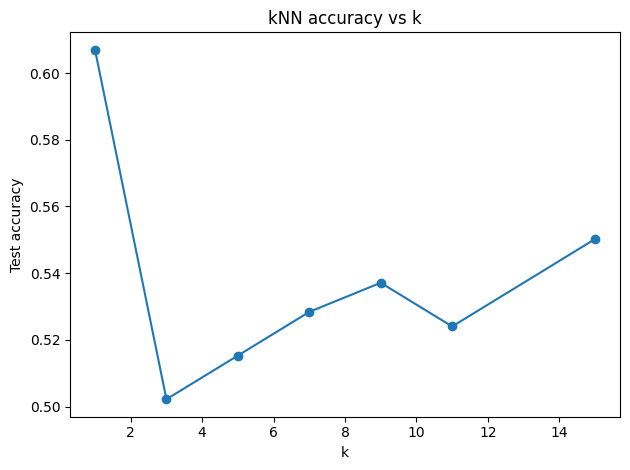

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_k['k'], df_k['test_accuracy'], marker='o')
plt.xlabel('k')
plt.ylabel('Test accuracy')
plt.title('kNN accuracy vs k')
plt.tight_layout()
plt.show()

**5-fold cross-validation (average accuracy).**

In [30]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for tr, te in kf.split(X):
    X_tr, X_te = X.iloc[tr], X.iloc[te]
    y_tr, y_te = y.iloc[tr], y.iloc[te]
    m = KNeighborsClassifier(n_neighbors=5)
    m.fit(X_tr, y_tr)
    preds = m.predict(X_te)
    scores.append(accuracy_score(y_te, preds))

cv_mean = sum(scores)/len(scores)
print('5-fold CV mean accuracy:', cv_mean)

5-fold CV mean accuracy: 0.47769861334559105
